In [1]:
import ipywidgets
from OperatorFunctions import *
from CommonFunctions import *
from HamiltonianClass import Hamiltonian
from matplotlib import pyplot as plt
%matplotlib inline

## Heisenberg Hamiltonian

# <center>$\hat{H} = \frac{J}{2}\sum_{i=1}^{L-1}\left(\hat{S}_i^+\hat{S}_{i+1}^- + \hat{S}_i^-\hat{S}_{i+1}^+ \right) + J\Delta\sum_{i=1}^{L-1}\hat{S}_i^z\hat{S}_{i+1}^z$</center>

Where:

* $L$ is the number of spins in the system
* $J$ describes the type of interaction
* $\Delta$ describes anisotropy of the system and $\Delta = 1$ means isotropic case
* $\hat{S}^+$ is a creation operaton
* $\hat{S}^-$ is an annihilation operator
* $\hat{S}^z$ is a spin-projection operator

## Spin Operators
We represent spin in bra-ket notation, where $|\uparrow\rangle$ means spin up and $|\downarrow\rangle$ means spin down.

In the model we use three types of operators:
   * Creation operator: $\hat{S}^+ = \hat{S}^x + i\hat{S}^y$</li>
   * Annihilation operator: $\hat{S}^- = \hat{S}^x - i\hat{S}^y$</li>
   * Projection operator onto Z axis: $\hat{S}^z$</li>

And each one of them must satisfy two properties:
   * $\hat{S}^+|\uparrow\rangle = 0$ and $\hat{S}^+|\downarrow\rangle = |\uparrow\rangle$
   * $\hat{S}^-|\uparrow\rangle = |\downarrow\rangle$ and $\hat{S}^-|\downarrow\rangle = 0$
   * $\hat{S}^z|\uparrow\rangle = \frac{1}{2}|\uparrow\rangle$ and $\hat{S}^z|\downarrow\rangle = -\frac{1}{2}|\downarrow\rangle$

In [2]:
spin_state = '0110'
new_state = s_plus_minus(0, spin_state) # 0 means we start from spin at index 0
print(f'Spin state after applying operators went from state |{spin_state}> to |{new_state}>')

Spin state after applying operators went from state |0110> to |1010>


In [3]:
spin_state = '1010'
new_state = s_minus_plus(2, new_state)
print(f'Spin state after applying operators went from state |{new_state}> to |{new_state}>')

Spin state after applying operators went from state |1001> to |1001>


In [4]:
s_minus_plus(2, '1001') # returns empty string if applying operator results in 0

''

In [5]:
new_state = '1010'
boundary_state = s_plus_minus_boundary(new_state)
print(f'Spin state after applying operators went from state |{new_state}> to |{boundary_state}>')

Spin state after applying operators went from state |1010> to |0011>


In [6]:
new_state = '0101'
proj1 = s_z(0, new_state)
proj2 = s_z(1, new_state)
print(f'In the state |{new_state}> spin number 1 gives value {proj1} and spin 2 gives {proj2}')

In the state |0101> spin number 1 gives value -0.5 and spin 2 gives 0.5


In [7]:
zero_state = '0000'
one_state = '1111'
spin_zero_state = '0011'

total_spin1 = s_total(zero_state)
total_spin2 = s_total(spin_zero_state)
total_spin3 = s_total(one_state)

print(f'Total spin of state |{zero_state}>: {total_spin1}')
print(f'Total spin of state |{spin_zero_state}>: {total_spin2}')
print(f'Total spin of state |{one_state}>: {total_spin3}')

Total spin of state |0000>: -2.0
Total spin of state |0011>: 0.0
Total spin of state |1111>: 2.0


## Basis

We put a number and specify bitstring length

In [8]:
integer_to_binary(0, 2)

'00'

In [9]:
integer_to_binary(262, 10)

'0100000110'

Basis elements for all possible values are stored in a generator

In [10]:
for i, basis_state in enumerate(generate_basis_states(start=0, stop=8, length=3)):
    print(f'{i} -> |{basis_state}>')

0 -> |000>
1 -> |001>
2 -> |010>
3 -> |011>
4 -> |100>
5 -> |101>
6 -> |110>
7 -> |111>


In [11]:
L, J, delta = 3, 1, 1
hamiltonian = Hamiltonian(L=L, J=J, delta=delta)
hamiltonian.print_hamiltonian_data()

L = 3, J = 1, delta = 1, hamiltonian size: 8 x 8


In [12]:
hamiltonian.print_matrix()

Matrix size: 8 x 8
Basis:
      000      001      010      011      100      101      110      111      

        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0


First part of the hamiltonian $H_k$:

## $\hat{H_k} = \frac{J}{2}\sum_{i=1}^{L-1}\left(\hat{S}_i^+\hat{S}_{i+1}^- + \hat{S}_i^-\hat{S}_{i+1}^+ \right)$

In [13]:
hamiltonian._prepare_hamiltonian_k()
hamiltonian.print_matrix()

Matrix size: 8 x 8
Basis:
      000      001      010      011      100      101      110      111      

        0        0        0        0        0        0        0        0
        0        0   0.5000        0        0        0        0        0
        0   0.5000        0        0   0.5000        0        0        0
        0        0        0        0        0   0.5000        0        0
        0        0   0.5000        0        0        0        0        0
        0        0        0   0.5000        0        0   0.5000        0
        0        0        0        0        0   0.5000        0        0
        0        0        0        0        0        0        0        0


and second part $H_p$:

## $\hat{H_p} = J\Delta\sum_{i=1}^{L-1}\hat{S}_i^z\hat{S}_{i+1}^z$

In [14]:
hamiltonian.reset_hamiltonian()
hamiltonian._prepare_hamiltonian_p()
hamiltonian.print_matrix()

Matrix size: 8 x 8
Basis:
      000      001      010      011      100      101      110      111      

   0.5000        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0  -0.5000        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0  -0.5000        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0   0.5000


Both parts combined:

In [15]:
hamiltonian.prepare_hamiltonian()
hamiltonian.print_matrix()

Matrix size: 8 x 8
Basis:
      000      001      010      011      100      101      110      111      

   0.5000        0        0        0        0        0        0        0
        0        0   0.5000        0        0        0        0        0
        0   0.5000  -0.5000        0   0.5000        0        0        0
        0        0        0        0        0   0.5000        0        0
        0        0   0.5000        0        0        0        0        0
        0        0        0   0.5000        0  -0.5000   0.5000        0
        0        0        0        0        0   0.5000        0        0
        0        0        0        0        0        0        0   0.5000


## Periodic Boundary Conditions

$\hat{H} = \frac{J}{2}\sum_{i=1}^{L-1}\left(\hat{S}_i^+\hat{S}_{i+1}^- + \hat{S}_i^-\hat{S}_{i+1}^+ \right) + J\Delta\sum_{i=1}^{L-1}\hat{S}_i^z\hat{S}_{i+1}^z + \frac{J}{2}\left(\hat{S}_L^+\hat{S}_{1}^- + \hat{S}_L^-\hat{S}_{1}^+ \right) + J\Delta \hat{S}_L^z\hat{S}_{1}^z$

In [16]:
hamiltonian_pbc = Hamiltonian(L, J, delta, is_pbc=True)
hamiltonian_pbc.prepare_hamiltonian()

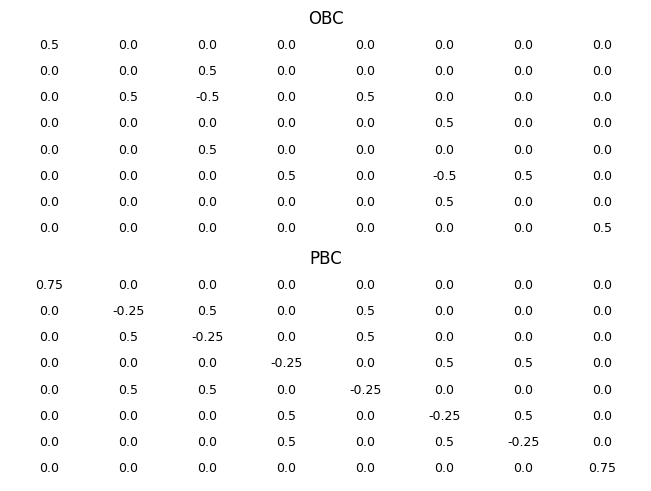

In [17]:
figure, axes = plt.subplots(2, 1, layout='constrained')

hamiltonian.plot_data(axes=axes[0])
axes[0].set_title('OBC')

hamiltonian_pbc.plot_data(axes=axes[1])
axes[1].set_title('PBC');

## Block Diagonalization

We focus on total spin of the system (magnetization) $S^z_{tot} = \sum_i S^z_i$.

$S^z_{tot} = 0$

In [18]:
hamiltonian = Hamiltonian(L=4, J=1, delta=1)
hamiltonian.print_basis()
print(f'size of basis: {hamiltonian.system_size}')

|0000>
|0001>
|0010>
|0011>
|0100>
|0101>
|0110>
|0111>
|1000>
|1001>
|1010>
|1011>
|1100>
|1101>
|1110>
|1111>
size of basis: 16


In [19]:
hamiltonian.block_concatenation(total_spin=0)
hamiltonian.print_basis()
print(f'size of basis: {hamiltonian.system_size}')

|0011>
|0101>
|0110>
|1001>
|1010>
|1100>
size of basis: 6


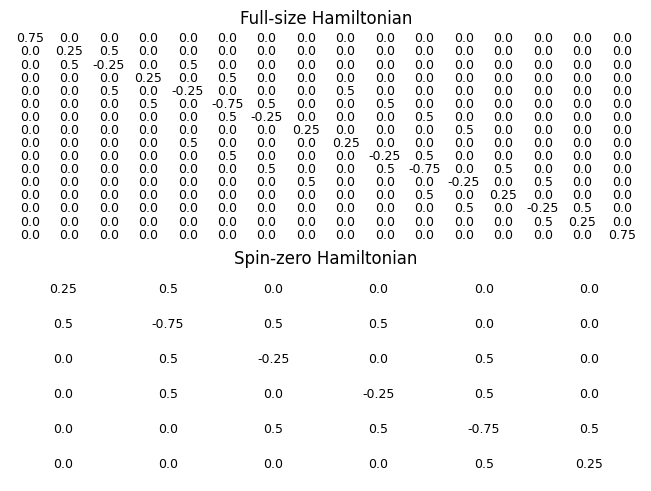

In [20]:
hamiltonian_unreduced = Hamiltonian(L=4, J=1, delta=1)
hamiltonian_unreduced.prepare_hamiltonian()
hamiltonian.prepare_hamiltonian()

figure2, axes2 = plt.subplots(2, 1, layout='constrained')

hamiltonian_unreduced.plot_data(axes=axes2[0])
axes2[0].set_title('Full-size Hamiltonian')

hamiltonian.plot_data(axes=axes2[1])
axes2[1].set_title('Spin-zero Hamiltonian');

In [23]:
def plot_hamiltonian(L=4, J=1, delta=1, pbc=False, block=False, total_spin=0):
    h = Hamiltonian(L=L, J=J, delta=delta, is_pbc=pbc)
    if block:
        h.block_concatenation(total_spin=total_spin)
    h.prepare_hamiltonian()
    fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(6, 6))
    h.plot_data(axes=ax)

In [24]:
ipywidgets.interact(plot_hamiltonian, L=[2, 3, 4, 5, 6], J=(-5, 5, 0.2), delta=(0, 5, 0.2),
                    pbc=[True, False], total_spin=[-1, 0, 1]);

interactive(children=(Dropdown(description='L', index=2, options=(2, 3, 4), value=4), FloatSlider(value=1.0, d…